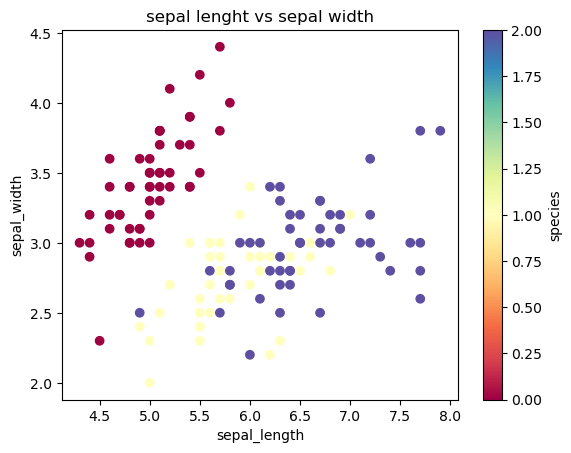

In [25]:
# 1
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['specie'] = iris.target

# Plot 
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['specie'], cmap='Spectral')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('sepal lenght vs sepal width')
plt.colorbar(label='species')
plt.show()

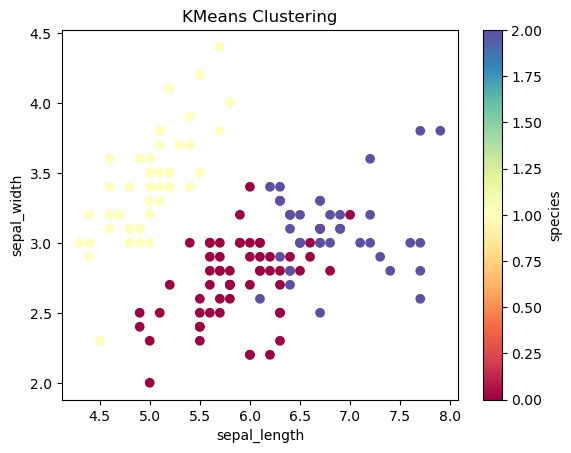

In [9]:
# 2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Create cluster
kmeans = KMeans(n_clusters=3, n_init='auto')
df['cluster'] = kmeans.fit_predict(df)

# Plot
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['cluster'], cmap='Spectral')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('KMeans Clustering')
plt.colorbar(label='species')
plt.show()

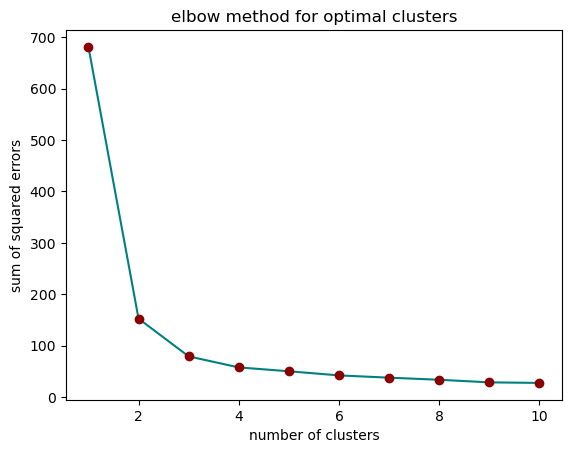

In [7]:
# 3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# Plot SSE for each number of clusters
plt.plot(range(1, 11), sse, marker='o', color='teal', markerfacecolor='darkred', markeredgecolor='darkred')
plt.xlabel('number of clusters')
plt.ylabel('sum of squared errors')
plt.title('elbow method for optimal clusters')
plt.show()

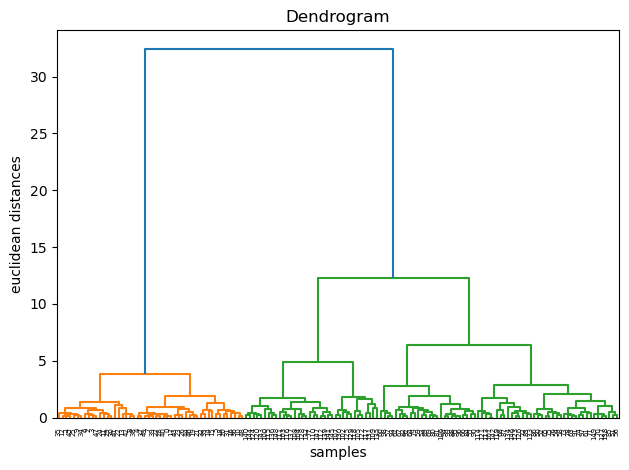

In [23]:
# 4
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# load data
iris = load_iris()
x = iris.data

# Perform hierarchical clustering
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
model.fit(x)

# Create dendrogram and plot
dendogram = sch.dendrogram(sch.linkage(x, method='ward'), leaf_rotation=90)
plt.xlabel('samples')
plt.ylabel('euclidean distances')
plt.title('Dendrogram')
plt.tight_layout()
plt.show()

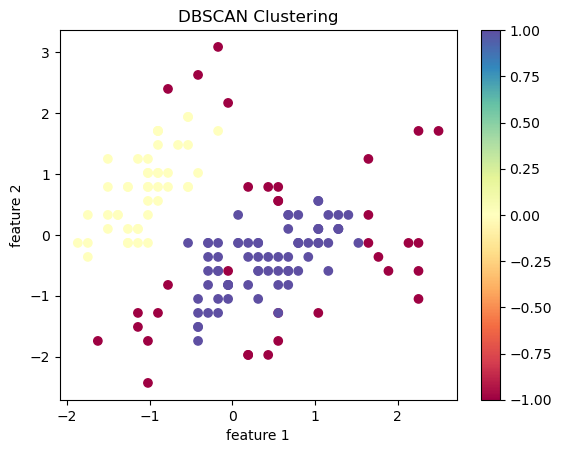

In [40]:
# 5
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# load data
iris = load_iris()
x = iris.data

# Standadize features
x_scaled = StandardScaler().fit_transform(x)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(x_scaled)

# Plot
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters, cmap='Spectral', label='Cluster label')
plt.title('DBSCAN Clustering')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.colorbar()
# plt.savefig('test.png')
plt.show()

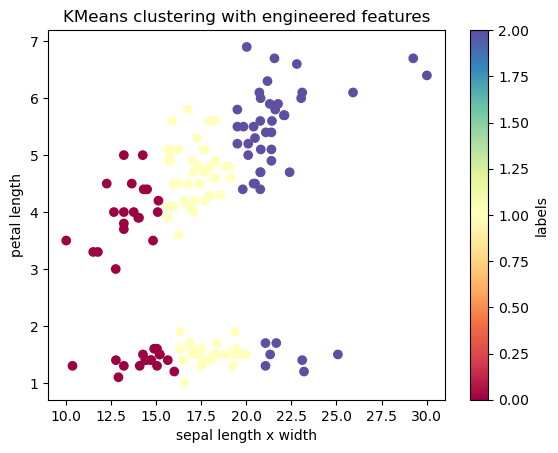

In [66]:
# 6
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add columns
df['product'] = df['sepal length (cm)'] * df['sepal width (cm)'] # Product of sepal length by sepal width

# Selecting features from clustering
x = df[['product', 'petal length (cm)']].values

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, n_init='auto')
clusters = kmeans.fit(x)
labels = kmeans.labels_

# Plot
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='Spectral')
plt.xlabel('sepal length x width')
plt.ylabel('petal length')
plt.title('KMeans clustering with engineered features')
plt.colorbar(label='labels')
plt.show()

In [88]:
# 7
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, n_init='auto')
labels = kmeans.fit_predict(df.iloc[:, :-1])

# Calculate silhoulette score
score = silhouette_score(df.iloc[:, :-1], labels)
print('silhoulette score:', score)

silhoulette score: 0.551191604619592


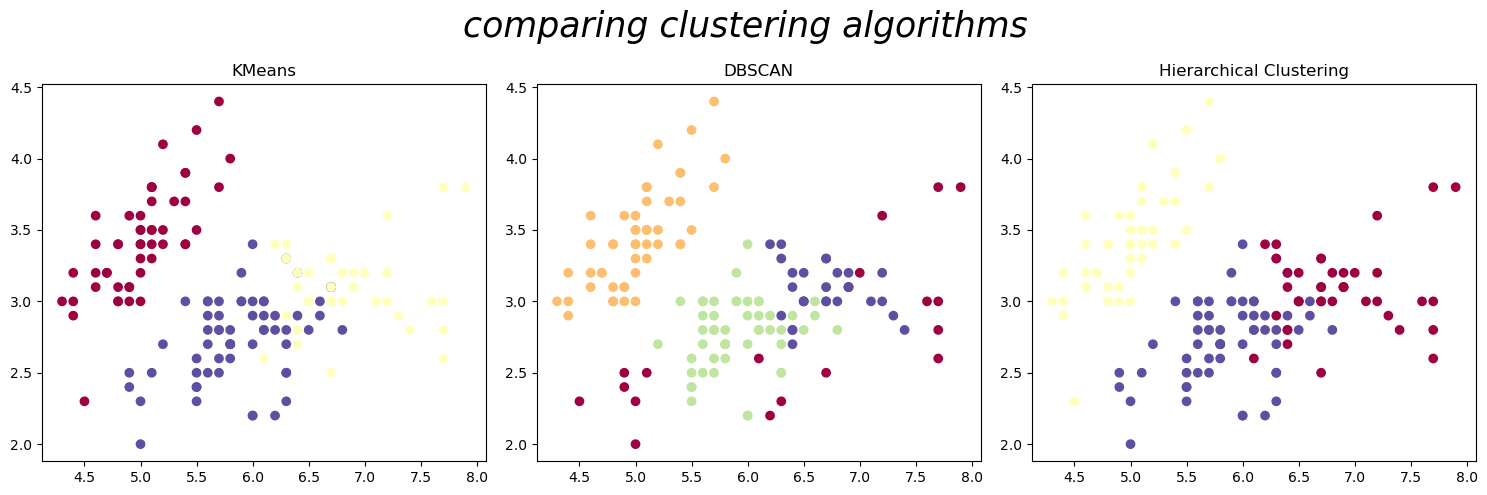

In [121]:
# 8
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# KMeans
kmeans = KMeans(n_clusters=3, n_init='auto')
df['kmeans'] = kmeans.fit_predict(df)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan'] = dbscan.fit_predict(df)

# Hierarchical clustering
hier = AgglomerativeClustering(n_clusters=3)
df['hier_label'] = hier.fit_predict(df)

# Plot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['kmeans'], cmap='Spectral')
ax[0].set_title('KMeans')
ax[1].scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['dbscan'], cmap='Spectral')
ax[1].set_title('DBSCAN')
ax[2].scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['hier_label'], cmap='Spectral')
ax[2].set_title('Hierarchical Clustering')
plt.suptitle('comparing clustering algorithms', size=25, style='italic')
plt.tight_layout()
plt.show()

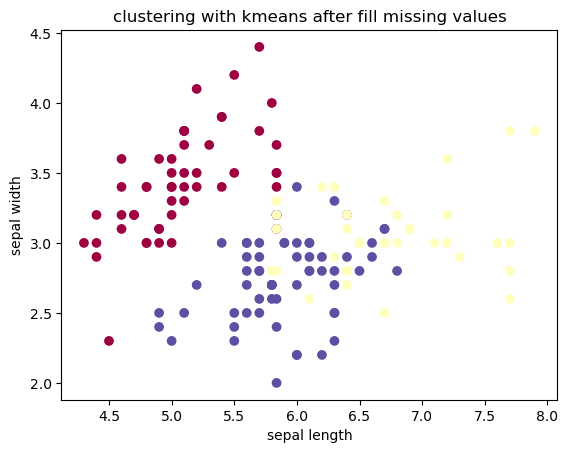

In [133]:
# 9
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Introduce missing values
df.iloc[::10, 0] = pd.NA

# Handle missing data
df['sepal length (cm)'].fillna(df['sepal length (cm)'].mean(), inplace=True)

# Perform clustering
kmeans = KMeans(n_clusters=3, n_init='auto')
labels = kmeans.fit_predict(df)

# Plot
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels, cmap='Spectral')
plt.title('clustering with kmeans after fill missing values')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

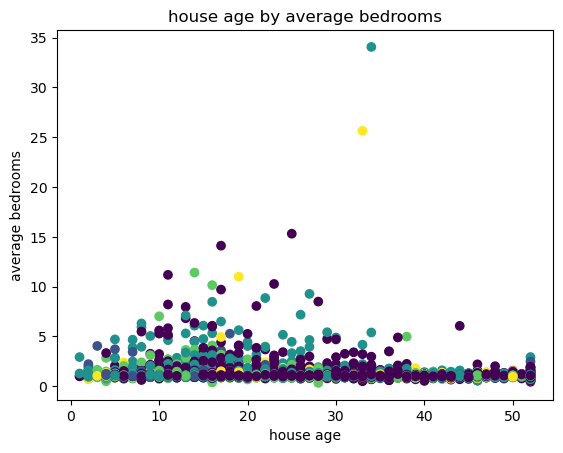

In [145]:
# 10
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.cluster import KMeans

# Load data
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['target'] = california.target

# Perform clustering 
kmeans = KMeans(n_clusters=5, n_init='auto')
df['cluster'] = kmeans.fit_predict(df[['target']])

plt.scatter(df['HouseAge'], df['AveBedrms'], c=df['cluster'])
plt.xlabel('house age')
plt.ylabel('average bedrooms')
plt.title('house age by average bedrooms')
plt.show()